# Adult Census Data

**Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.**

### Data Information
- Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
- Prediction task is to determine whether a person makes over 50K a year.

### Attribute Information
- Listing of attributes: >50K, <=50K.

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

URL: https://archive.ics.uci.edu/ml/datasets/adult

In [628]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import math

import tensorflow as tf


import warnings
warnings.filterwarnings('ignore')

In [629]:
print("Checking for physical Tensorflow or GPU devices -->")
for device in tf.config.list_physical_devices():
    print(": {}".format(device.name))

Checking for physical Tensorflow or GPU devices -->
: /physical_device:CPU:0


In [630]:
# Set the GPU/TPU device name
# SET_DEVICE = ''

## Data Exploration and Pre-Processing

In [631]:
# change the input path if running from local
input_start_path = '/kaggle/input/incomedata/'
# if local same folder uncomment following
# input_start_path = './'

columnNames = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race',
              'sex','capital-gain','capital-loss','hours-per-week','native-country','class']

adult_df = pd.read_csv(input_start_path+'adult.data', names=columnNames, header=None, sep=', ',engine='python')
adult_df_test = pd.read_csv(input_start_path+'adult.test', header=None,names=columnNames, skiprows=1,sep=', ',engine='python')

In [632]:
# Train data
adult_df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [636]:
# Test data
adult_df_test.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


In [634]:
# class values ends with .
adult_df_test[['class','noise']] = adult_df_test['class'].str.split('.',expand=True)
adult_df_test = adult_df_test.drop(columns=['noise'])

In [635]:
# Dimensions
print("Train: {}, Test:{}".format(adult_df.shape,adult_df_test.shape))

Train: (32561, 15), Test:(16281, 15)


In [481]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [482]:
adult_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16281 non-null  object
 14  class           16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [637]:
# Missing values - '?'
adult_df = adult_df.replace('?',math.nan)
adult_df_test = adult_df_test.replace('?',math.nan)

# another dataset with missing values replaced by 'X'
adult_df_X = adult_df.replace('?','X')
adult_df_test_X = adult_df_test.replace('?','X')

**Missing values in the original data set were present as '?'. Created two sets of data a) replacing missing with nan values and b) replacing with 'X'. This was done to check both possibilities of data with null values ('X') or after removing the missing values.**

In [638]:
# Missing values
print("Train Data total missing values observed in --")
print(adult_df.isna().sum()[adult_df.isna().sum()>0])

print("\nTest Data total missing values observed in --")
print(adult_df_test.isna().sum()[adult_df.isna().sum()>0])

print("Shape: Train: {}, Test:{}".format(adult_df.shape,adult_df_test.shape))

Train Data total missing values observed in --
workclass         1836
occupation        1843
native-country     583
dtype: int64

Test Data total missing values observed in --
workclass         963
occupation        966
native-country    274
dtype: int64
Shape: Train: (32561, 15), Test:(16281, 15)


In [639]:
# Utility functions

# Dropping the Null value rows from train and test
def drop_null(df,df_test):
    print(" Shape Before: Train: {}, Test:{}".format(df.shape,df_test.shape))
    df = df.dropna()
    df_test = df_test.dropna()
    print(" Shape After: Train: {}, Test:{}".format(df.shape,df_test.shape))
    return df,df_test

# Dropping same columns from train and test
def drop_cols(df,df_test,_list):
    print(" Shape Before: Train: {}, Test:{}".format(df.shape,df_test.shape))
    df = df.drop(columns=_list)
    df_test = df_test.drop(columns=_list)
    print(" Shape After: Train: {}, Test:{}".format(df.shape,df_test.shape))
    return df,df_test

# Plot count of classes in a feature
def count_plot(df,col_name,title="",fig_height =15, fig_width =12, save_fig_name=None, subplot_row=2, subplot_col=1, subplot_num=1):
    fig = plt.figure(figsize=(fig_width,fig_height))
    plt.subplot(subplot_row, subplot_col, subplot_num)
    plt.title(title)
    ax = sns.countplot(data=df,  y=col_name)
    total = len(df[col_name])
    for p in ax.patches:
            percentage = '{:.2f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    
    if(save_fig_name == None):
        return plt
    else:
        plt.savefig(save_fig_name+".png")
        return plt
    
# plot count of data point in features w.r.t class >50k and <=50k
def class_plot(df,feature,title="", save_fig_name=None):
    d = df[[feature,'class']]
    d.groupby('class')[feature].value_counts().unstack(0).plot.barh()
    plt.title(title)
    if(save_fig_name == None):
        return plt
    else:
        plt.savefig(save_fig_name+".png")
        return plt

In [640]:
adult_df.groupby(['education','education-num','class'])['class'].count()

education     education-num  class
10th          6              <=50K     871
                             >50K       62
11th          7              <=50K    1115
                             >50K       60
12th          8              <=50K     400
                             >50K       33
1st-4th       2              <=50K     162
                             >50K        6
5th-6th       3              <=50K     317
                             >50K       16
7th-8th       4              <=50K     606
                             >50K       40
9th           5              <=50K     487
                             >50K       27
Assoc-acdm    12             <=50K     802
                             >50K      265
Assoc-voc     11             <=50K    1021
                             >50K      361
Bachelors     13             <=50K    3134
                             >50K     2221
Doctorate     16             <=50K     107
                             >50K      306
HS-grad       9    

**education and education-num feature represent same information hence one column can be removed**

In [641]:
_list = ['education-num']
adult_df,adult_df_test = drop_cols(adult_df,adult_df_test,_list)

 Shape Before: Train: (32561, 15), Test:(16281, 15)
 Shape After: Train: (32561, 14), Test:(16281, 14)


In [642]:
adult_df_X,adult_df_test_X = drop_cols(adult_df_X,adult_df_test_X,_list)

 Shape Before: Train: (32561, 15), Test:(16281, 15)
 Shape After: Train: (32561, 14), Test:(16281, 14)


In [489]:
'''# Converting education number to string object
adult_df = adult_df.astype({'education-num':str})
adult_df_test = adult_df_test.astype({'education-num':str})

adult_df_X = adult_df_X.astype({'education-num':str}).dtypes
adult_df_test_X = adult_df_test_X.astype({'education-num':str})'''

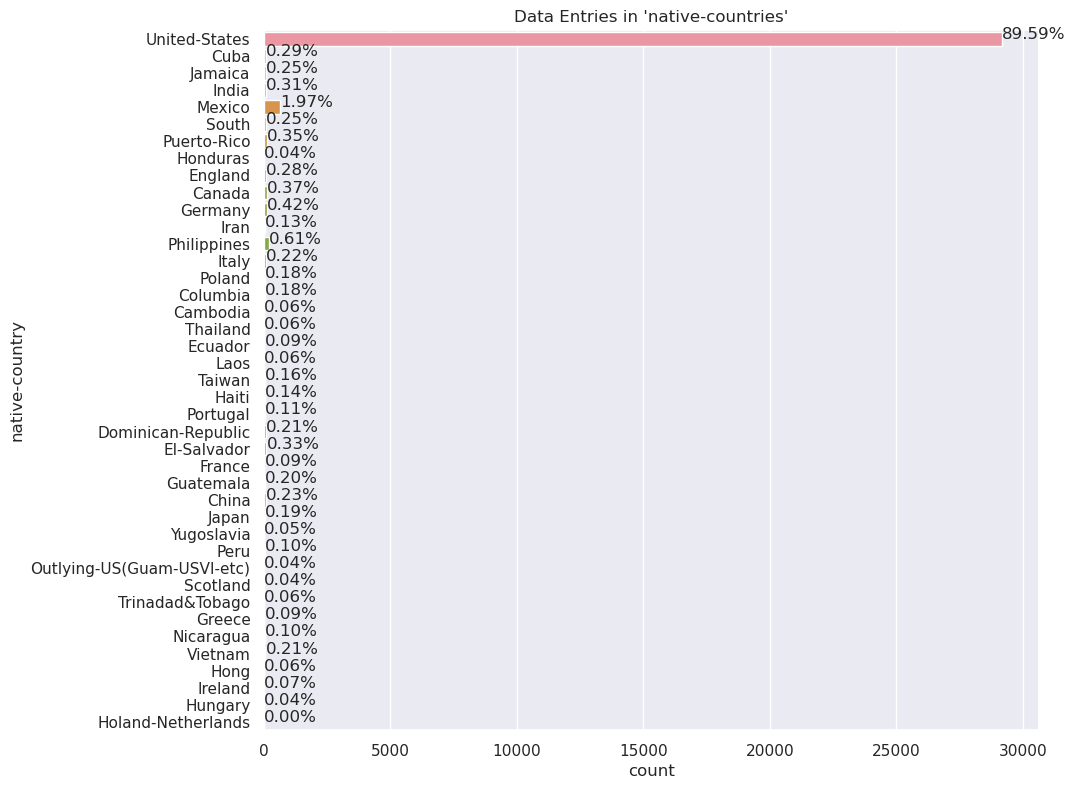

In [490]:
# Native country 
count_plot(adult_df,"native-country",title="Data Entries in 'native-countries'",fig_height=20,fig_width=10).show()

**As we can see the the feature 'native-country is significantly inbalanced with maximum data points (90%) from USA. Similar pattern seen in test data as well. Hence dropping this redundant column deemed ideal**

In [645]:
# Dropping Native Country
_list = ['native-country']
adult_df,adult_df_test = drop_cols(adult_df,adult_df_test,_list)
adult_df_X,adult_df_test_X = drop_cols(adult_df_X,adult_df_test_X,_list)

 Shape Before: Train: (32561, 14), Test:(16281, 14)
 Shape After: Train: (32561, 13), Test:(16281, 13)
 Shape Before: Train: (32561, 14), Test:(16281, 14)
 Shape After: Train: (32561, 13), Test:(16281, 13)


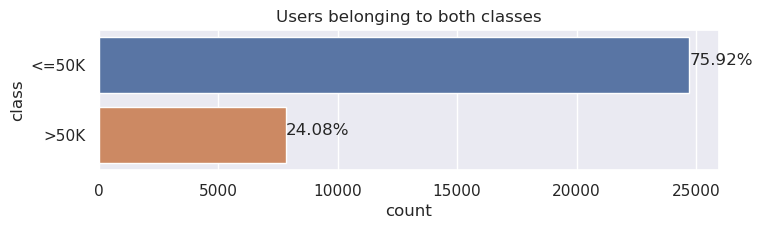

In [492]:
# Users belonging to both classes
count_plot(adult_df,"class",title="Users belonging to both classes",fig_height=4,fig_width=8).show()

**Majority of users in the training data belong to the class with income less that or equal to 50,000 USD**

In [493]:
# Before further exploration we drop the missing values
adult_df,adult_df_test = drop_null(adult_df,adult_df_test)

# note we have another dataset with  missing values replaced with X

 Shape Before: Train: (32561, 13), Test:(16281, 13)
 Shape After: Train: (30718, 13), Test:(15315, 13)


**Some visualisations on the available feature w.r.t class label as follows:**

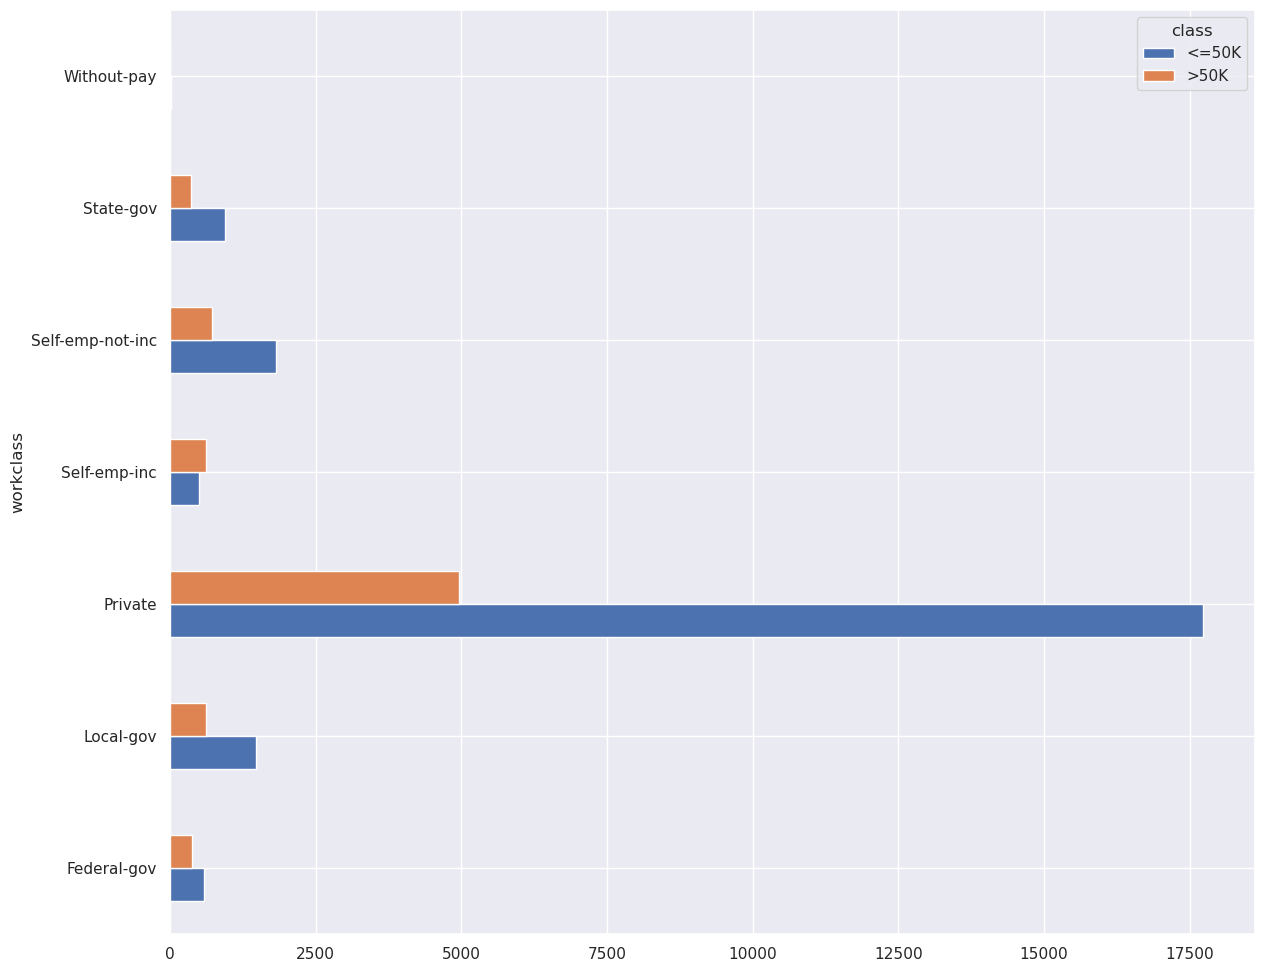

In [494]:
class_plot(adult_df,'workclass').show()

**As we can see most of the users belong to private work class with majority having income less than 50K**

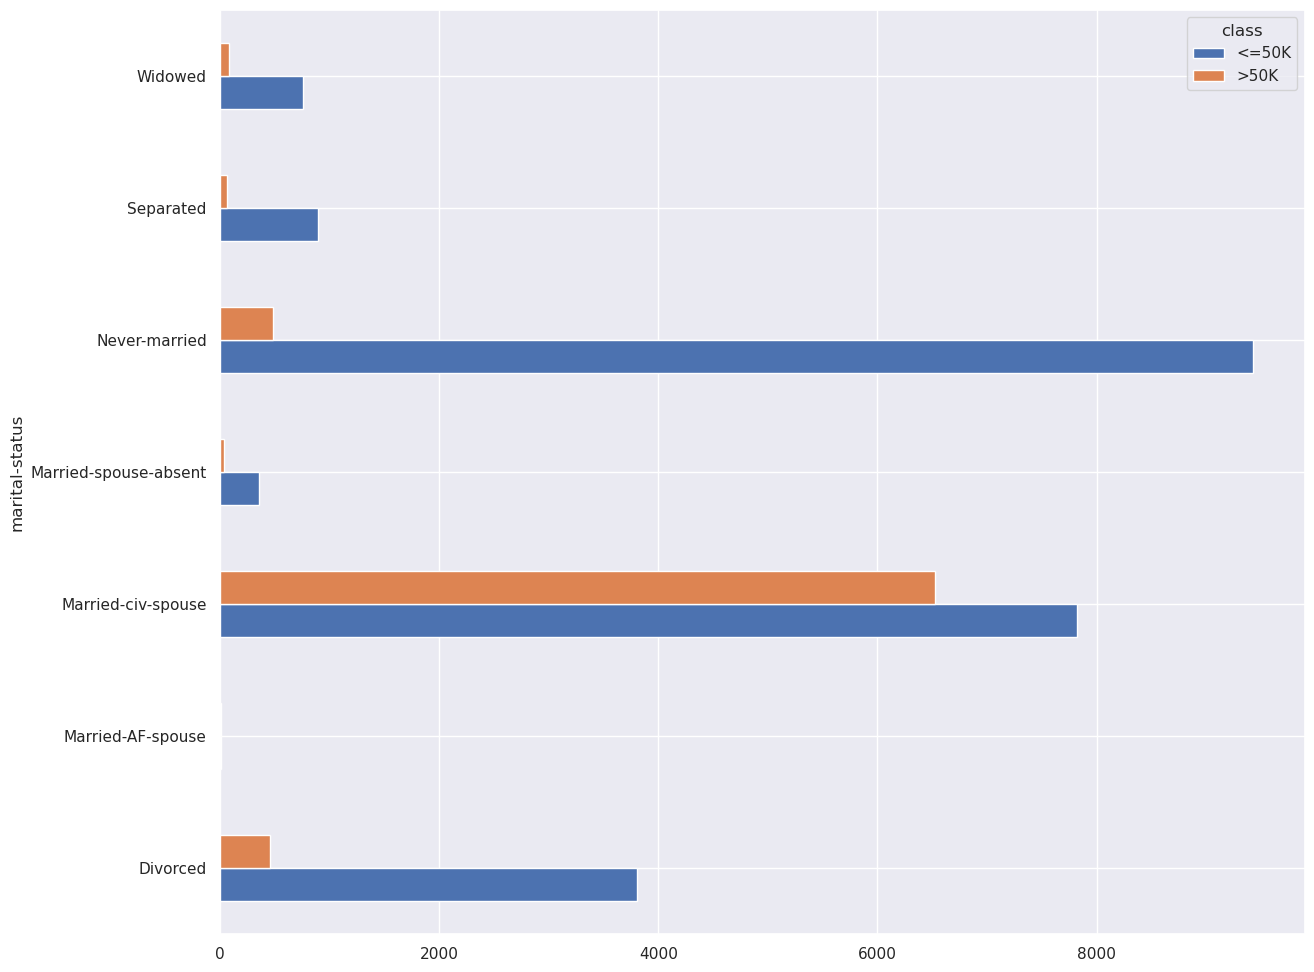

In [495]:
class_plot(adult_df,'marital-status').show()

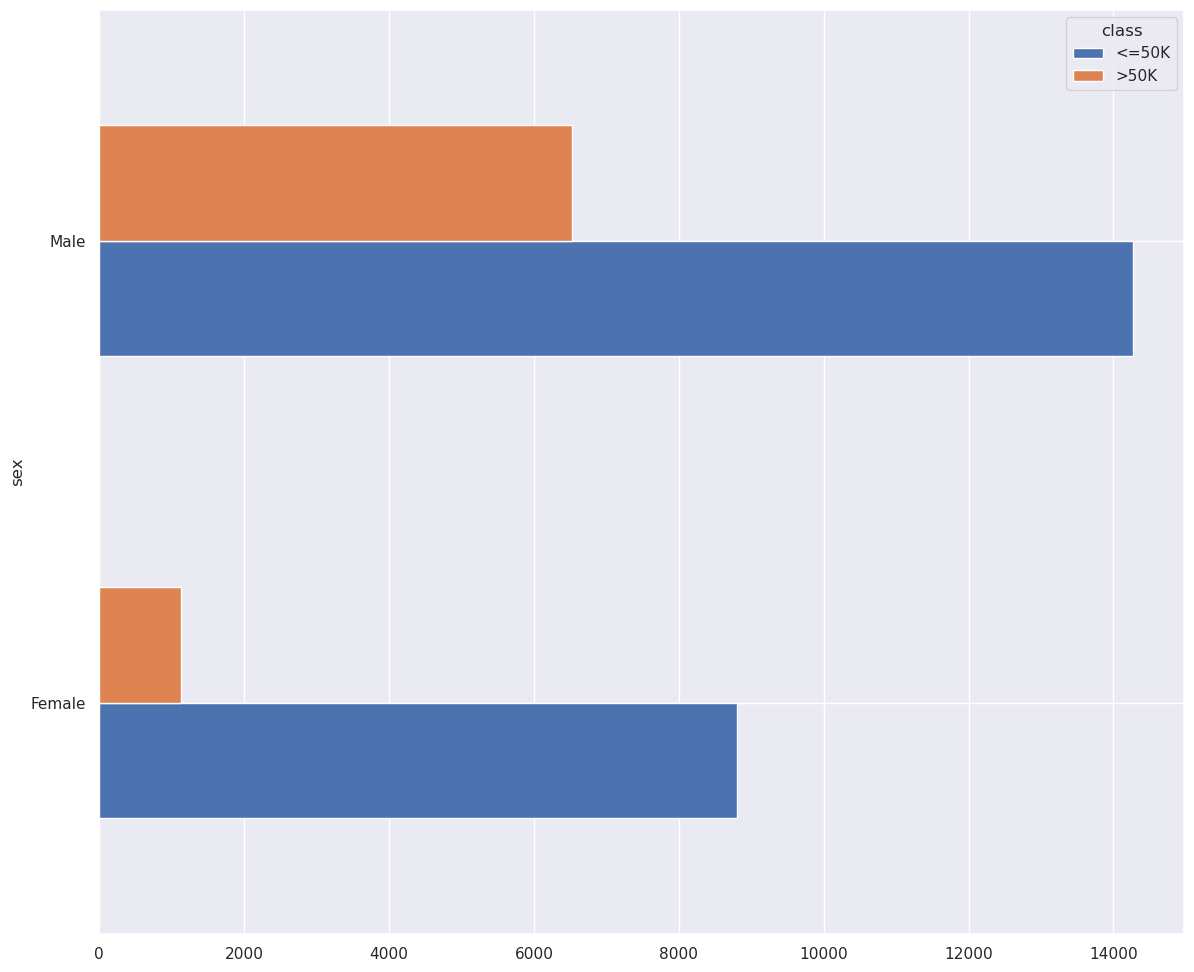

In [496]:
class_plot(adult_df,'sex').show()

**Data comprises mainly of Male users**

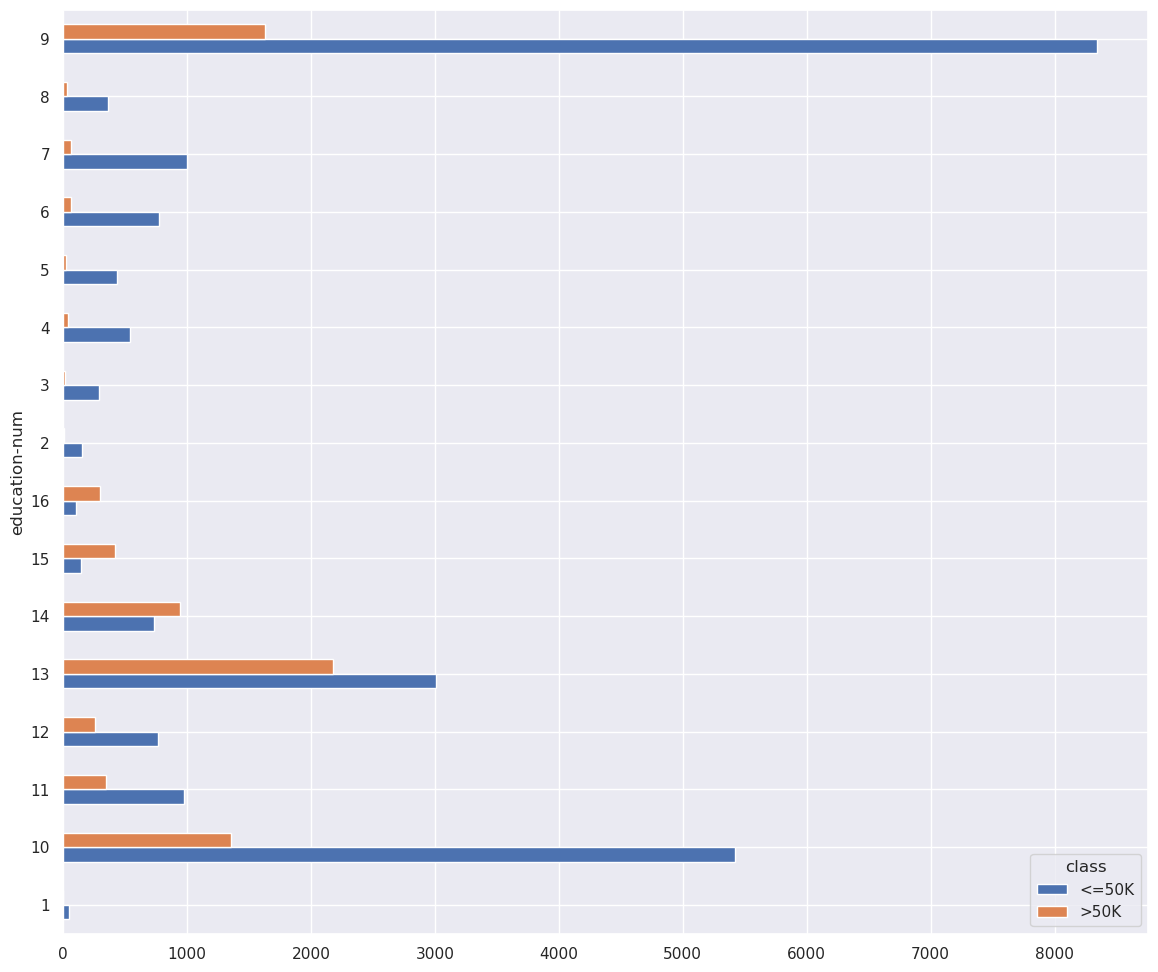

In [497]:
class_plot(adult_df,'education-num').show()

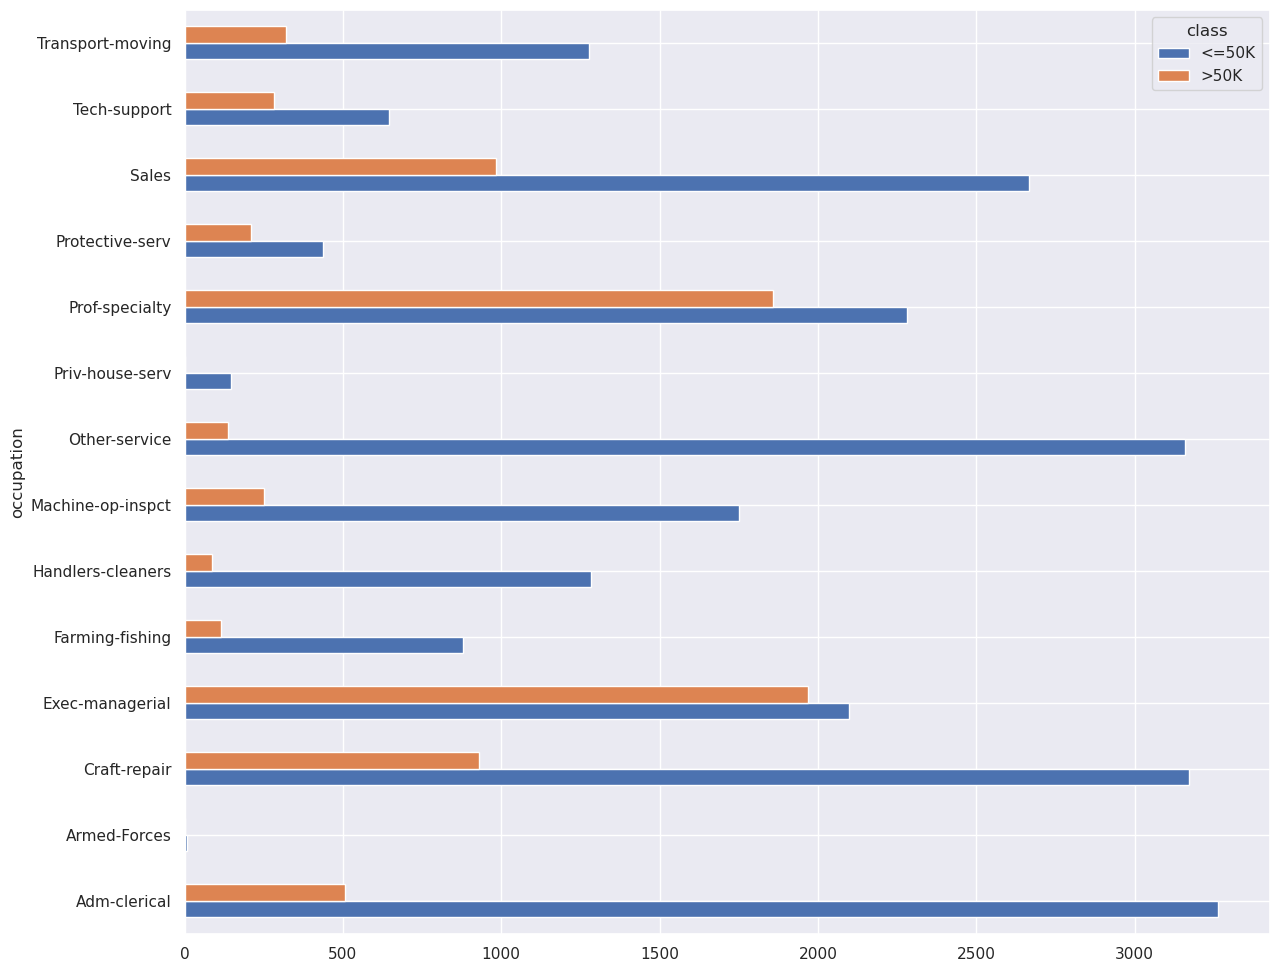

In [498]:
class_plot(adult_df,'occupation').show()

In [499]:
# Age although in numeric variable has limited values
adult_df['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 33, 76, 55, 61, 70, 64, 71, 66, 51, 58, 26, 17, 60,
       90, 75, 65, 77, 62, 63, 67, 74, 72, 69, 68, 73, 81, 78, 88, 80, 84,
       83, 85, 82, 86])

In [500]:
print("Minimum age: {}\nMaximum age: {}\nMean age: {}\nMedian age:{}".format(
     min(adult_df['age']), max(adult_df['age']), np.mean(adult_df['age']), np.median(adult_df['age'])))

Minimum age: 17
Maximum age: 90
Mean age: 38.44358356663845
Median age:37.0


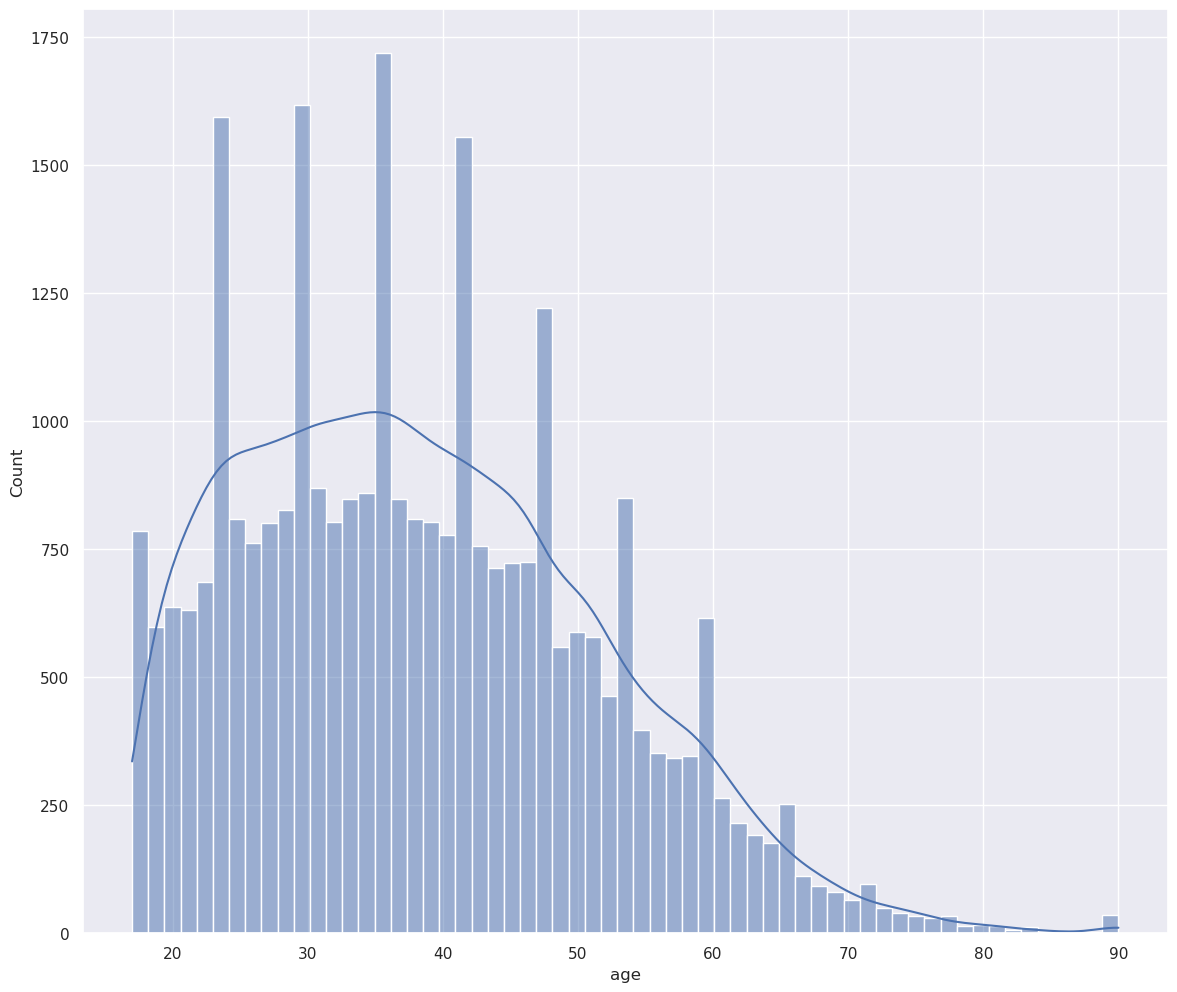

In [501]:
sns.histplot(data = adult_df,x = 'age', kde=True)
plt.show()

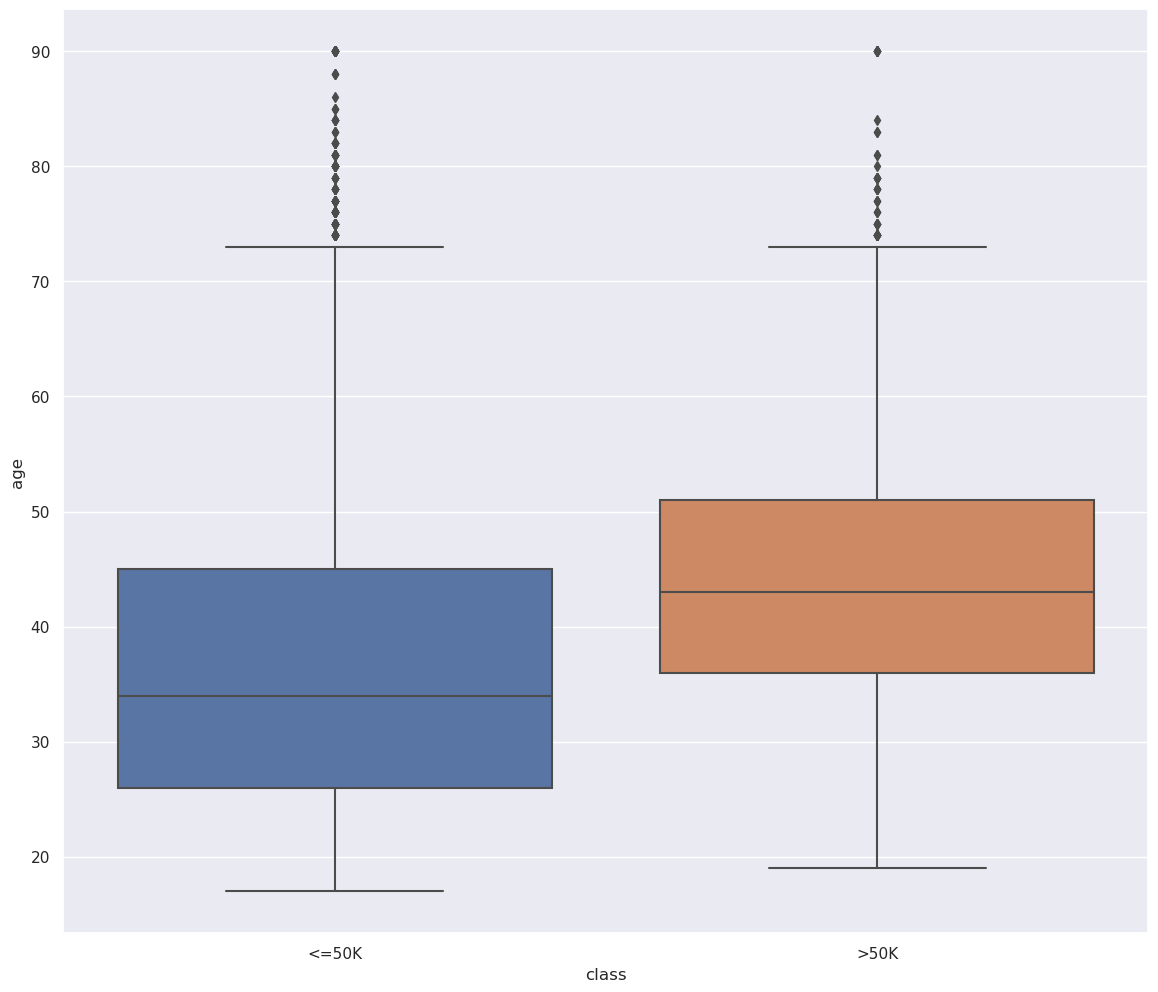

In [502]:
sns.boxplot(data = adult_df,x = 'class',y = 'age')
plt.show()

In [503]:
# So we can create age categories
# age<=25 = '15-25'
# 25<age<=35 = '15-35' ...
# ___________


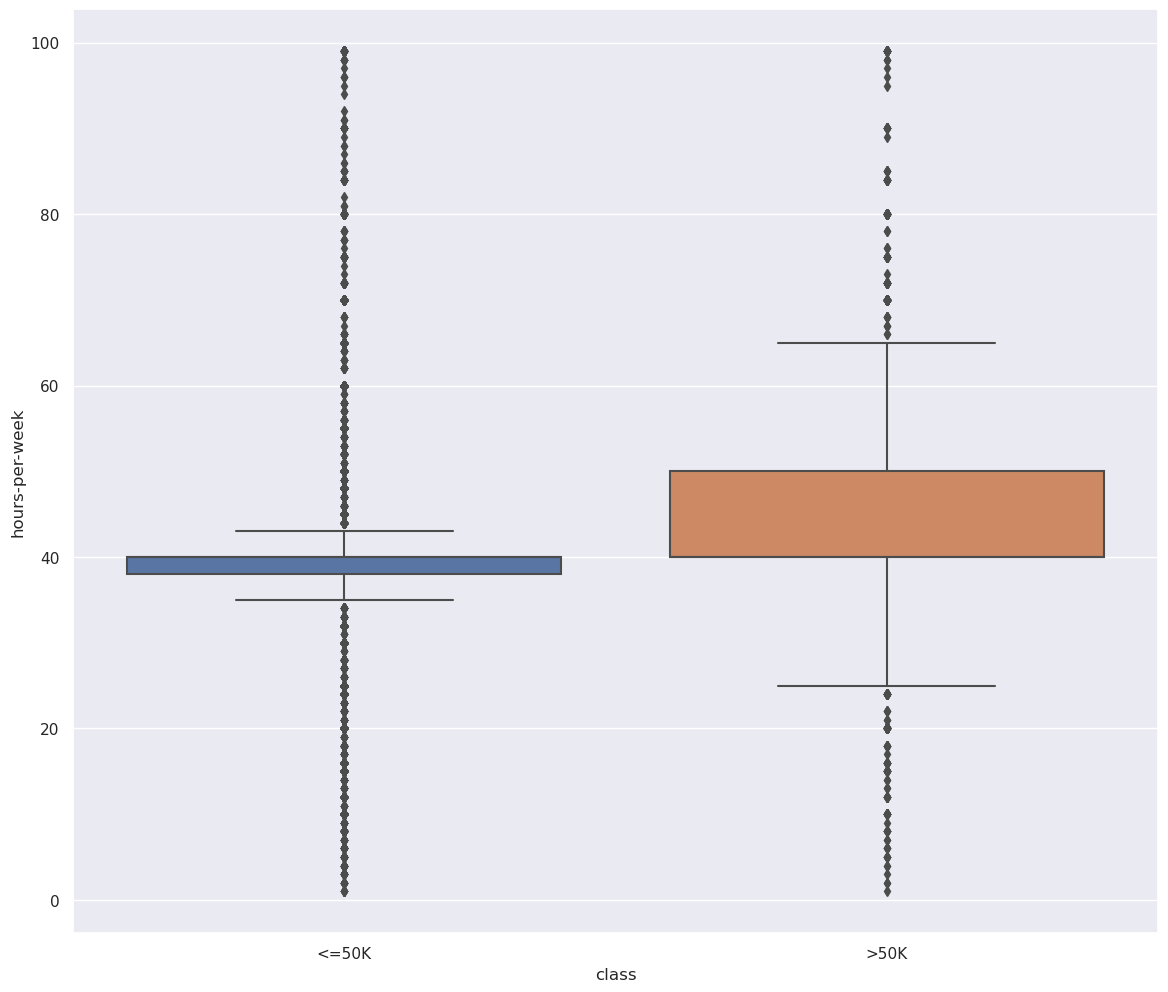

In [504]:
sns.boxplot(data = adult_df,x = 'class',y = 'hours-per-week')
plt.show()

In [505]:
## Can be further explored for more information

In [644]:
# Converting th class column to binary 1-0
adult_df['class'].replace({'<=50K':0,'>50K':1},inplace=True)
adult_df_test['class'].replace({'<=50K':0,'>50K':1},inplace=True)

adult_df_X['class'].replace({'<=50K':0,'>50K':1},inplace=True)
adult_df_test_X['class'].replace({'<=50K':0,'>50K':1},inplace=True)

adult_df.head(2)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0


### Checking Feature Importance

Ref URL: https://machinelearningmastery.com/calculate-feature-importance-with-python/

In [654]:
# Checking point biserial correlation for relation betwen numerical variables and class variables

# independant Feature names
# categorical
categorical_columns = adult_df.loc[:, adult_df.dtypes == object].columns
# numerical
numerical_columns = adult_df.loc[:, adult_df.dtypes != object].drop(columns=['class']).columns

for i in numerical_columns:
    print(i,'-->',round(st.pointbiserialr(adult_df['class'],adult_df[i])[0],6))

age --> 0.234037
fnlwgt --> -0.009463
capital-gain --> 0.223329
capital-loss --> 0.150526
hours-per-week --> 0.229689


**Fnlwgt has the least correlation hence we can drop the column**

In [655]:
_list = ['fnlwgt']
adult_df,adult_df_test = drop_cols(adult_df,adult_df_test,_list)
adult_df_X,adult_df_test_X = drop_cols(adult_df_X,adult_df_test_X,_list)

 Shape Before: Train: (32561, 13), Test:(16281, 13)
 Shape After: Train: (32561, 12), Test:(16281, 12)
 Shape Before: Train: (32561, 13), Test:(16281, 13)
 Shape After: Train: (32561, 12), Test:(16281, 12)


In [680]:
category

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex'],
      dtype='object')

In [679]:
features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex']

In [661]:
def train_test_split(df, df_test):
    X_train = df.drop(columns=['class'])
    y_train = df['class']
    X_test = df_test.drop(columns=['class'])
    y_test = df_test['class']
    
    return X_train,y_train,X_test,y_test

In [662]:
# Label encoding the categorical features and scaling the numerical features (min-max)
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler 

def label_encode(adult_df,adult_df_test):
    categorical_features = list(adult_df.select_dtypes(include=['object']).columns)
    label_encoder_feat = {}
    for i, feature in enumerate(categorical_features):
        label_encoder_feat[feature] = LabelEncoder()
        adult_df[feature] = label_encoder_feat[feature].fit_transform(adult_df[feature])
        adult_df_test[feature] = label_encoder_feat[feature].transform(adult_df_test[feature])

    return adult_df,adult_df_test


def min_max_scale(df,df_test):
    numerical_columns = df.loc[:, df.dtypes != object].columns
    scaler = MinMaxScaler()
    scaled_cols = scaler.fit_transform(df[numerical_columns])
    scaled_cols_test = scaler.transform(df_test[numerical_columns])
    
    for i in range(len(numerical_columns)):
        name = numerical_columns[i]
        df[name] = scaled_cols[:,i]
        df_test[name] = scaled_cols_test[:,i]
        
    return df, df_test


In [669]:
X_train,y_train,X_test,y_test = train_test_split(adult_df,adult_df_test)

# Features
X_train,X_test = label_encode(X_train,X_test)

X_train,X_test = min_max_scale(X_train,X_test)

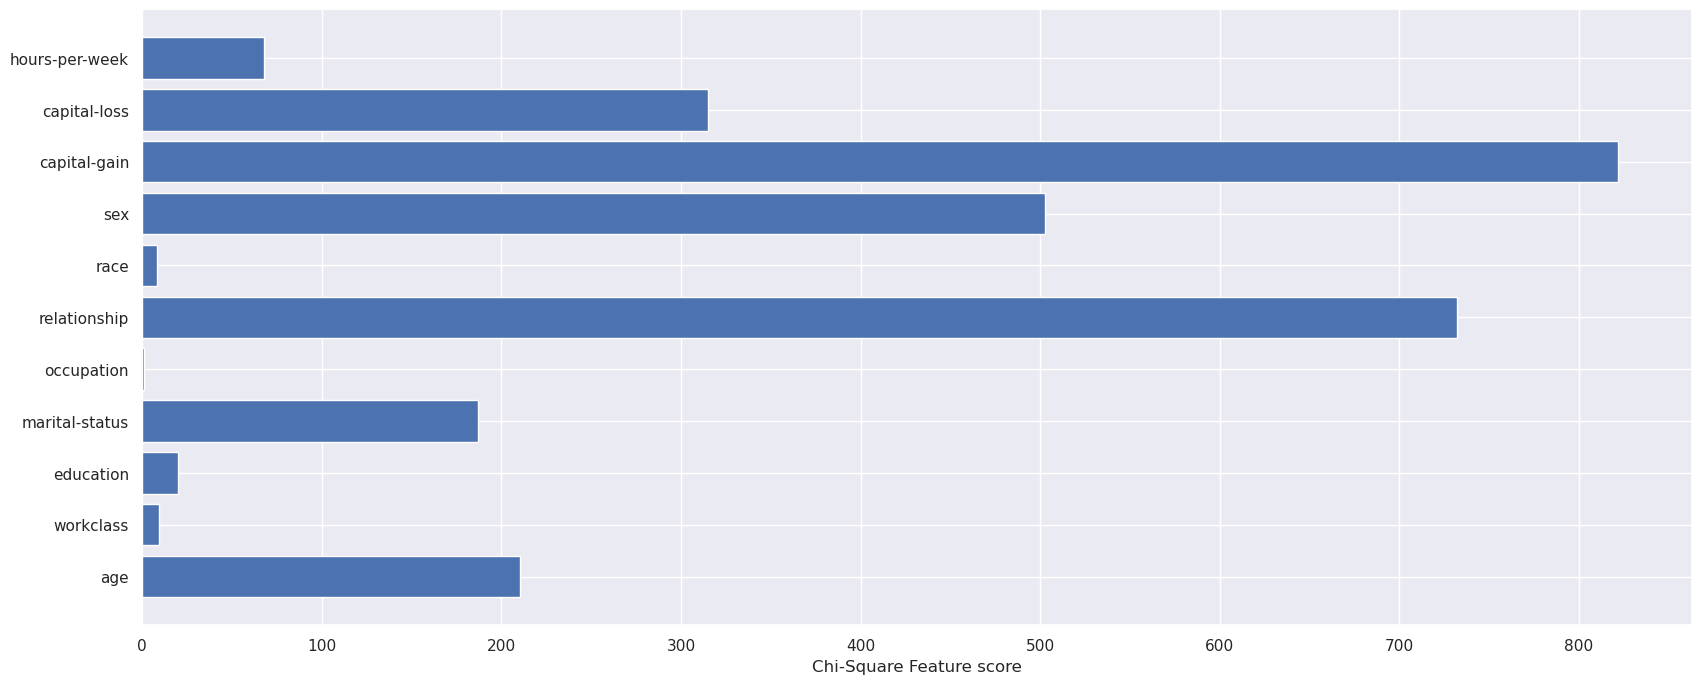

In [685]:
# Chi-Square feature selection test - check importance of feature

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def c_test(X_train,y_train):
    cols = X_train.columns
    X_train = X_train.to_numpy()
    y_train = y_train.to_numpy()
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    
    # what are scores for the features
    # for i in range(len(fs.scores_)): print('Feature %s: %f' % (cols[i], fs.scores_[i]))
        
    plt.figure(figsize = (20,8))
    # plot the scores
    plt.barh([i for i in cols],fs.scores_)
    plt.xlabel("Chi-Square Feature score")
    plt.savefig('chisq.png')
    plt.show()
c_test(X_train,y_train)

In [600]:
# Labels
# y_le = LabelEncoder()
# y_le.fit(y_train)
# y_train = y_le.transform(y_train)

# y_test = y_le.transform(y_test)

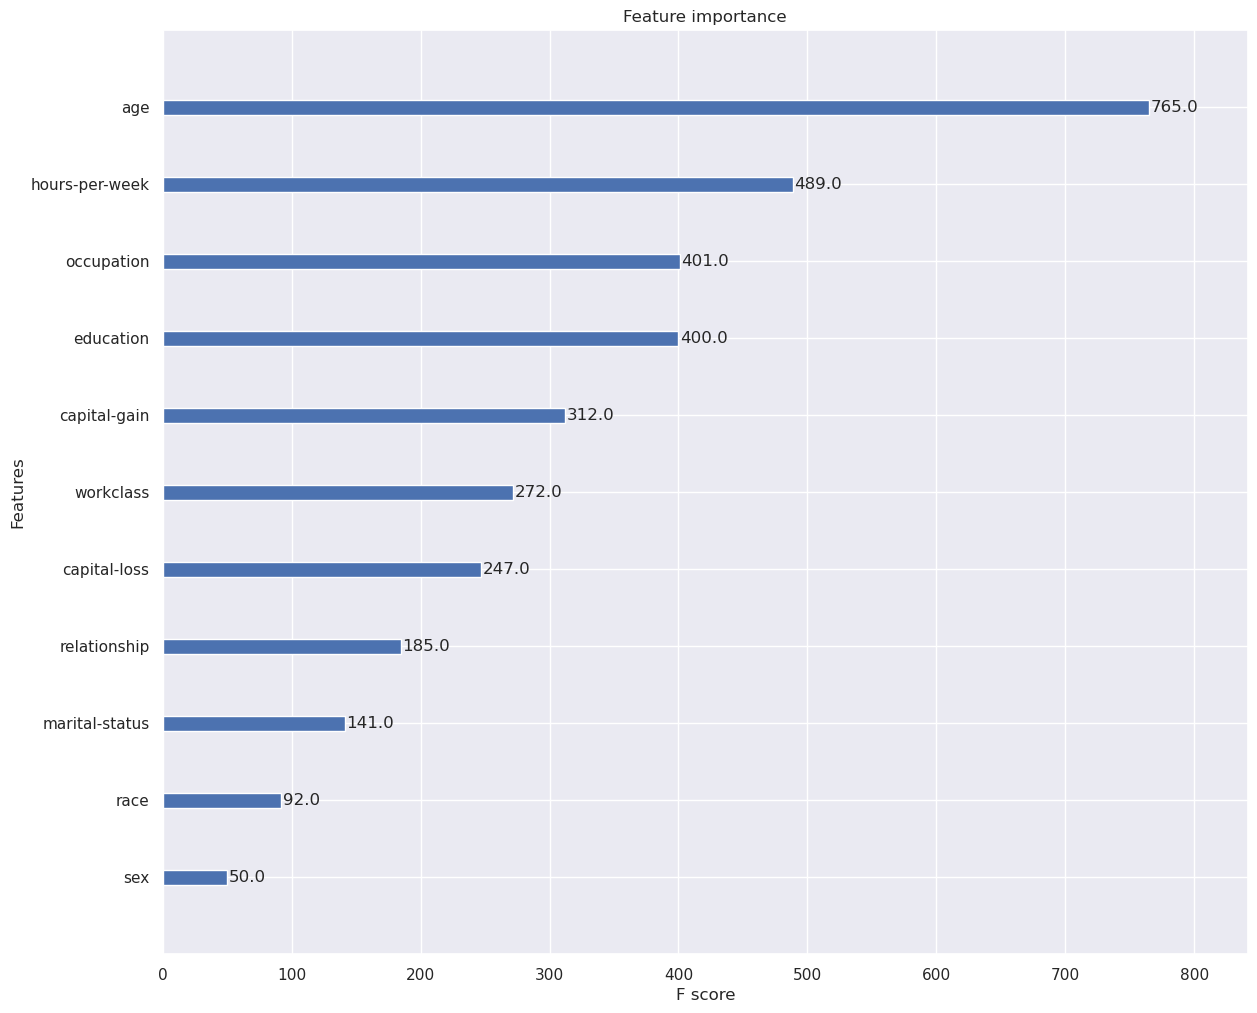

In [670]:
# Plotting the feature importances using the Boosted Gradient Descent
from xgboost import XGBClassifier

cols = X_train.columns

# Training the model
model = XGBClassifier()
model.fit(X_train, y_train)

model_importance = model.fit(X_train, y_train)

# Plotting the Feature importance bar graph
plt.rcParams['figure.figsize'] = [14,12]
# sns.set(style = 'darkgrid')
plot_importance(model_importance);

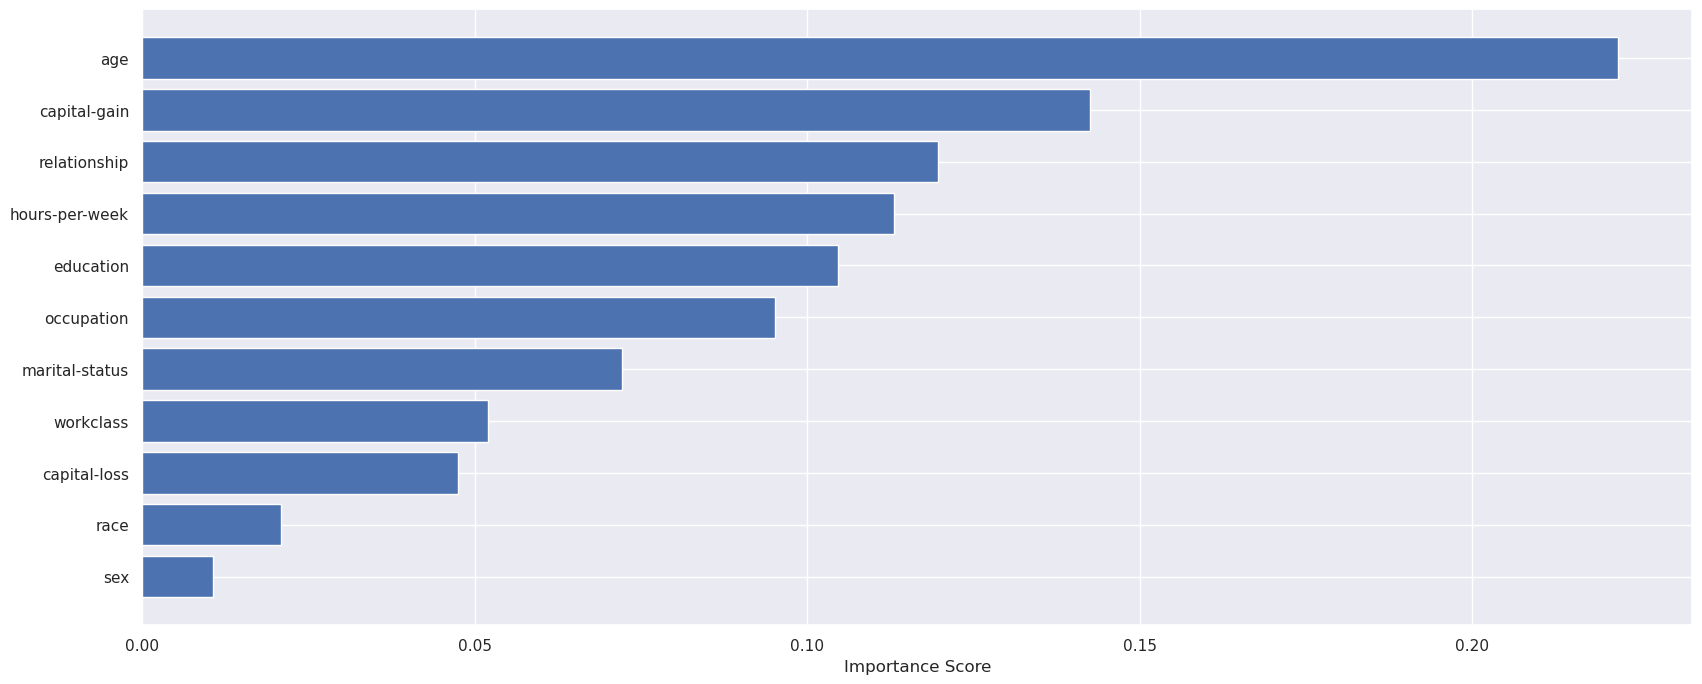

In [671]:
# Plotting the feature importances using the Random Forrest Regressor
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
cols = X_train.columns
# summarize feature importance
#for i,v in enumerate(importance):
     #print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize = (20,8))
# plot the scores
d = {cols[i]:importance[i] for i in range(len(cols))}
d = sorted(d.items(), key=lambda x:x[1])
plt.barh([i[0] for i in d],[i[1] for i in d])
plt.xlabel("Importance Score")
plt.show()

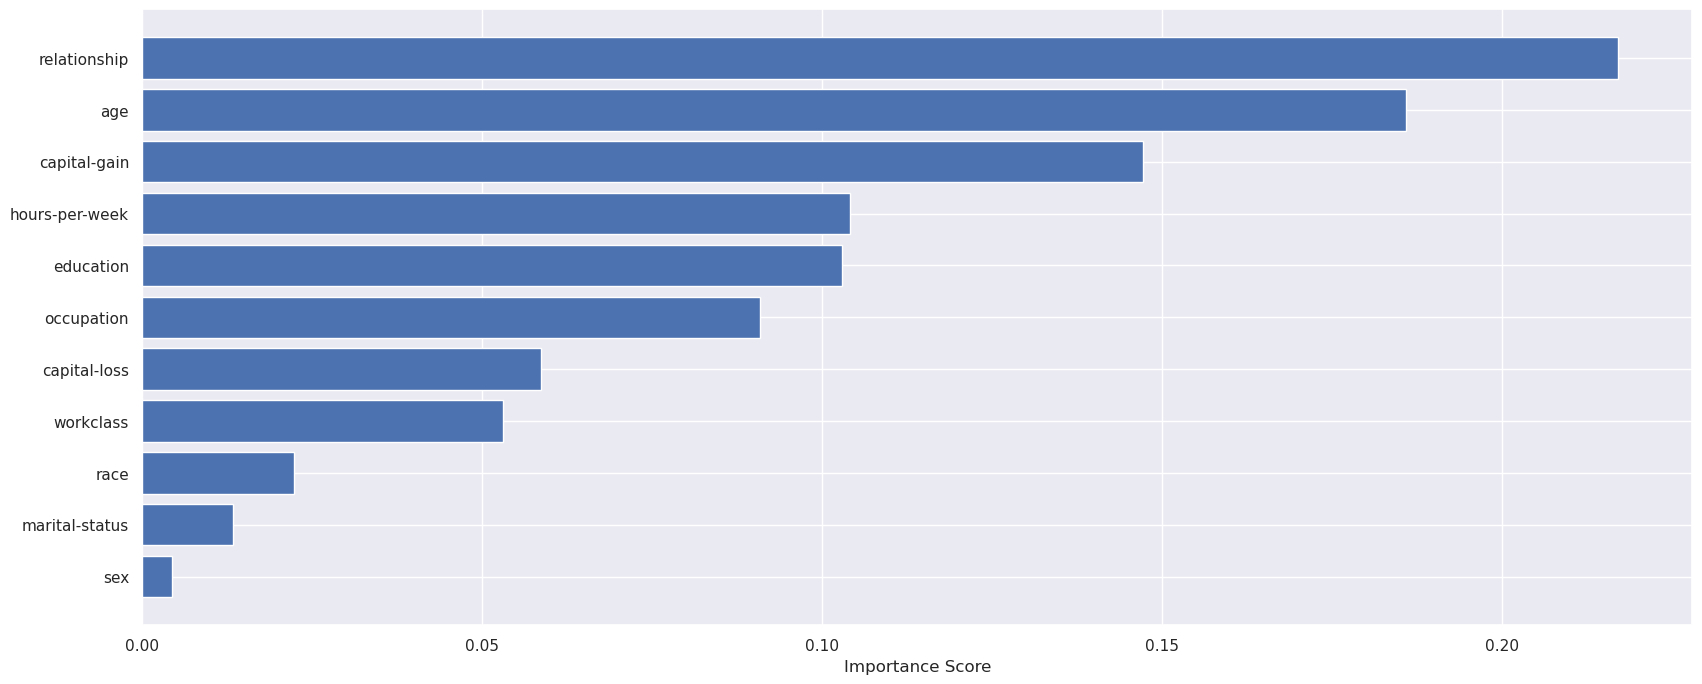

In [672]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
cols = X_train.columns
# plot feature importance
plt.figure(figsize = (20,8))
# plot the scores
d = {cols[i]:importance[i] for i in range(len(cols))}
d = sorted(d.items(), key=lambda x:x[1])
plt.barh([i[0] for i in d],[i[1] for i in d])
plt.xlabel("Importance Score")
plt.show()

In [686]:
X = X_train.copy()
X_t = X_test.copy()

In [687]:
# Based on above feature importance score (Chi sqr), removing feature
_list = ['race','education','workclass','occupation']
X_train,X_test = drop_cols(X_train,X_test,_list)


 Shape Before: Train: (32561, 11), Test:(16281, 11)
 Shape After: Train: (32561, 7), Test:(16281, 7)


In [688]:
X_train.head(2)

,age,marital-status,relationship,sex,capital-gain,capital-loss,hours-per-week
0,0.301370,0.666667,0.2,1.0,0.02174,0.0,0.397959
1,0.452055,0.333333,0.0,1.0,0.00000,0.0,0.122449


## Modelling

In [689]:
from tensorflow.keras.utils import to_categorical

# Before Using Neural networks, it is require to convert the target class vector 
# to a binary matrix

y_train = to_categorical(y_train, 2)
print('Label: ', y_train.shape)

Label:  (32561, 2)


In [690]:
X_train = X_train.to_numpy()

In [691]:
X_train.shape

(32561, 7)

In [692]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout, TimeDistributed
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras import backend as k
from keras.layers import GlobalAveragePooling1D, BatchNormalization, MaxPool1D, Reshape, Activation
from keras.layers import Conv1D, LSTM, GRU, Bidirectional, Input
import random
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

In [701]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

def predict_acc(model,X_test,y_test):
    y_tst = model.predict(X_test)
    y_classes = y_tst.argmax(axis=-1)
    #y_classes = y_le.inverse_transform(y_classes)
    
    print(accuracy_score(y_true=y_test, y_pred=y_classes))
    
    print(classification_report(y_test, y_classes))

In [702]:
predict_acc(model1,X_test,y_test)

509/509 [==============================] - 1s 1ms/step
0.819851360481543
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     12435
           1       0.69      0.44      0.53      3846

    accuracy                           0.82     16281
   macro avg       0.76      0.69      0.71     16281
weighted avg       0.81      0.82      0.80     16281



In [703]:
def plot_history(history):
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'])
    plt.subplot(2,1,2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'])
    return;


Epoch 1/50
407/407 [==============================] - 2s 3ms/step - loss: 0.5104 - accuracy: 0.7634 - val_loss: 0.4492 - val_accuracy: 0.7781
Epoch 2/50
407/407 [==============================] - 1s 3ms/step - loss: 0.4340 - accuracy: 0.7857 - val_loss: 0.4034 - val_accuracy: 0.8047
Epoch 3/50
407/407 [==============================] - 1s 3ms/step - loss: 0.4030 - accuracy: 0.8024 - val_loss: 0.3828 - val_accuracy: 0.8058
Epoch 4/50
407/407 [==============================] - 1s 3ms/step - loss: 0.3901 - accuracy: 0.8032 - val_loss: 0.3748 - val_accuracy: 0.8041
Epoch 5/50
407/407 [==============================] - 1s 3ms/step - loss: 0.3835 - accuracy: 0.8079 - val_loss: 0.3699 - val_accuracy: 0.8098
Epoch 6/50
407/407 [==============================] - 1s 3ms/step - loss: 0.3825 - accuracy: 0.8091 - val_loss: 0.3681 - val_accuracy: 0.8088
Epoch 7/50
407/407 [==============================] - 1s 3ms/step - loss: 0.3790 - accuracy: 0.8107 - val_loss: 0.3667 - val_accuracy: 0.8078
Epoch 

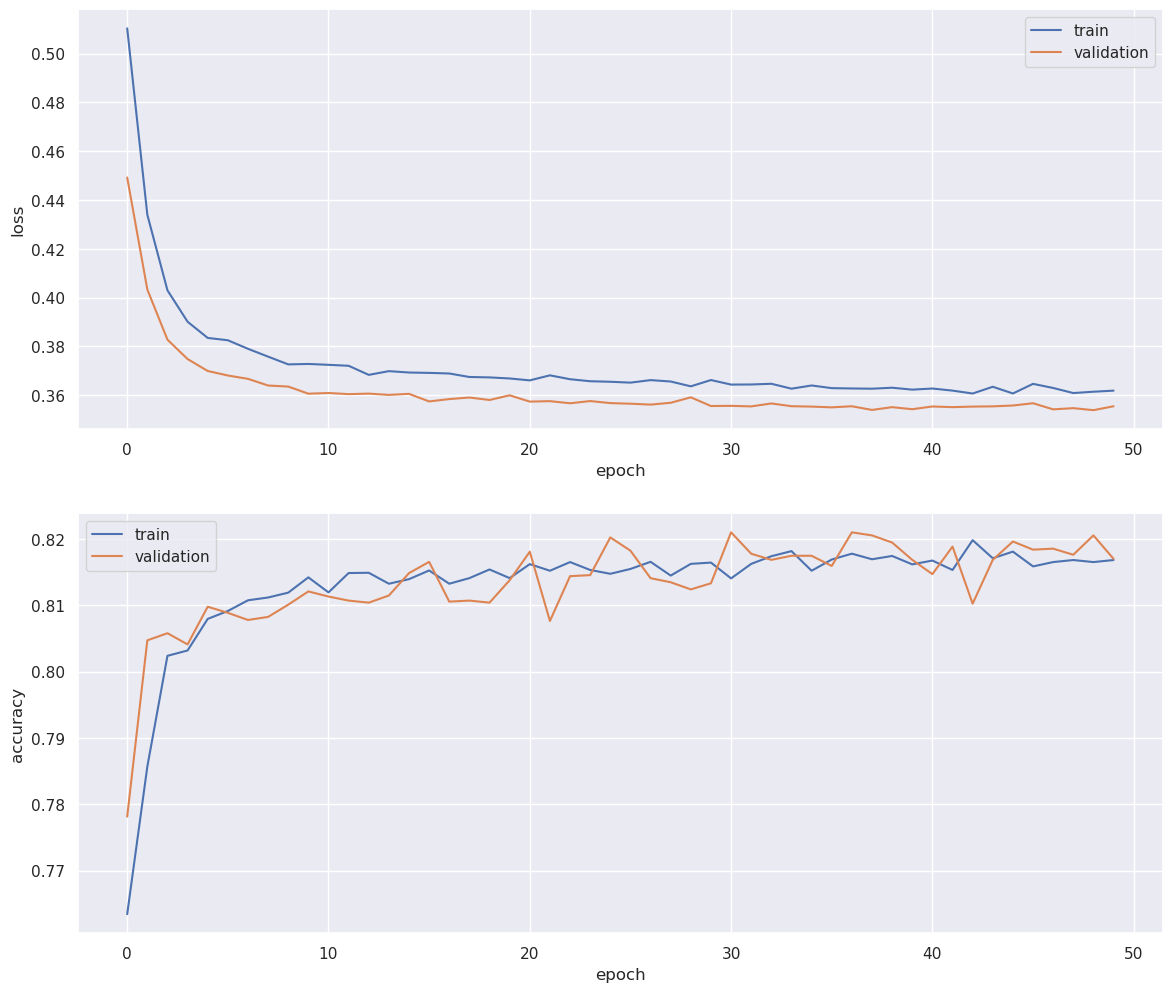

In [714]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))

# Compile the model
optimizer = tf.keras.optimizers.Adam(lr=0.0005)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64,verbose=1, validation_split=0.2)

predict_acc(model1,X_test,y_test)

plot_history(history)

In [709]:
def model_2(X_train, y_train,X_test,y_test):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(rate=0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(2, activation='sigmoid'))
    model.summary()
    
    model.compile(
        loss='binary_crossentropy',
        metrics=['accuracy'],
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
        
    history = model.fit(X_train, y_train,
                        batch_size=50, epochs=50,
                        verbose=2,
                        validation_split=0.1)
        
    plot_history(history)
        
    predict_acc(model,X_test,y_test)


Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_95 (Dense)            (None, 64)                512       
                                                                 
 dropout_25 (Dropout)        (None, 64)                0         
                                                                 
 dense_96 (Dense)            (None, 64)                4160      
                                                                 
 dropout_26 (Dropout)        (None, 64)                0         
                                                                 
 dense_97 (Dense)            (None, 32)                2080      
                                                                 
 dropout_27 (Dropout)        (None, 32)                0         
                                                                 
 dense_98 (Dense)            (None, 32)              

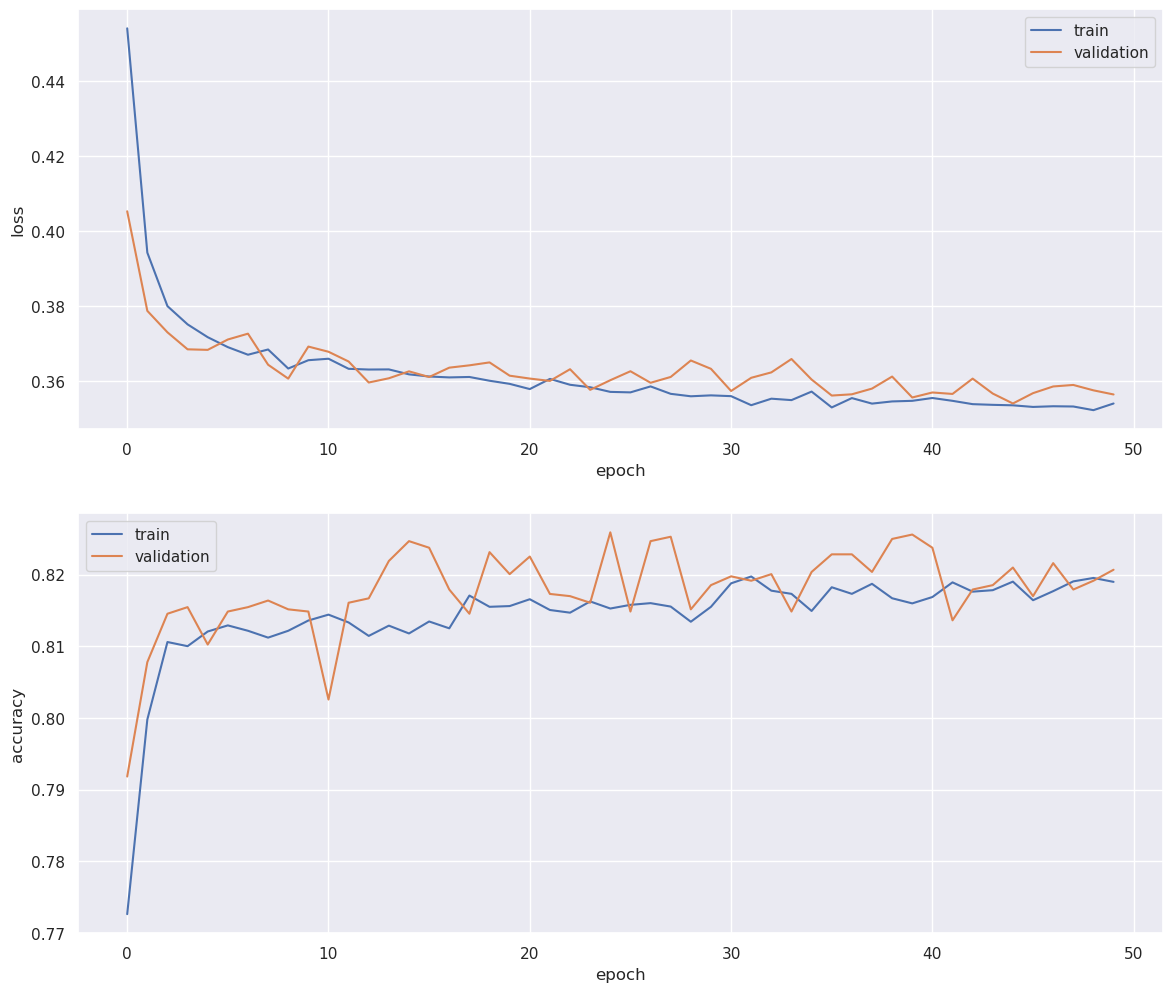

In [710]:
model_2(X_train, y_train,X_test,y_test)

In [715]:
X_train.shape

(32561, 7)

In [722]:
X = X_train.reshape(-1,7,1)
Xtt = X_test.reshape(-1,7,1)

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [729]:
Xt = X_test.to_numpy().reshape(-1,7,1)
Xt.shape

(16281, 7, 1)

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 3, 64)             384       
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 64)                0         
                                                                 
 dense_120 (Dense)           (None, 100)               6500      
                                                                 
 dense_121 (Dense)           (None, 2)                 202       
                                                                 
Total params: 7,086
Trainable params: 7,086
Non-trainable params: 0
___________________________________________________

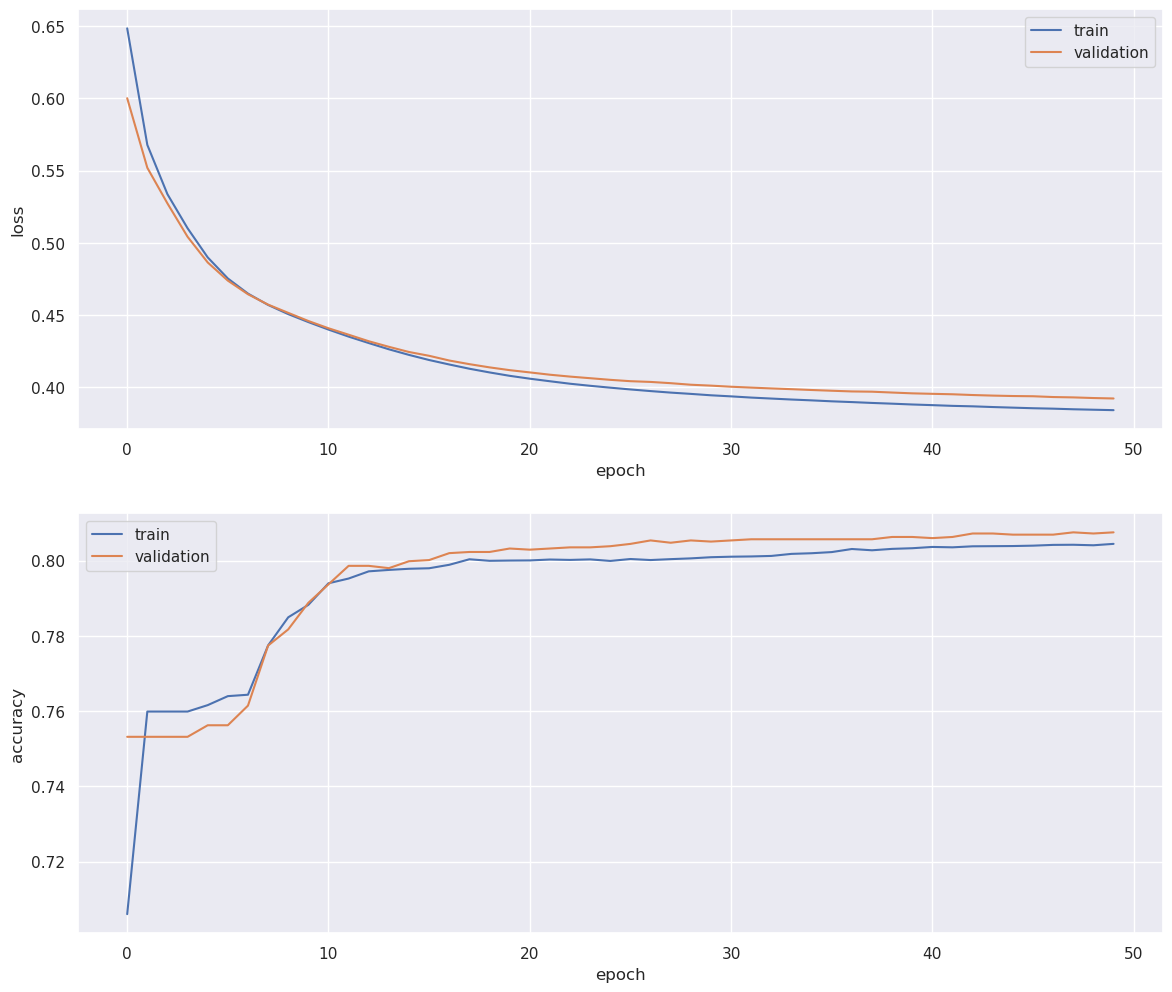

In [732]:
# Define the CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(7, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.summary()

model.compile(
        loss='binary_crossentropy',
        metrics=['accuracy'],
        optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5))

history = model.fit(X, y_train,
                        batch_size=64, epochs=50,
                        verbose=2,
                        validation_split=0.1)
        
plot_history(history)
        
predict_acc(model,Xt,y_test)


In [728]:
X_test

,age,marital-status,relationship,sex,capital-gain,capital-loss,hours-per-week
0,0.109589,0.666667,0.6,1.0,0.000000,0.0,0.397959
1,0.287671,0.333333,0.0,1.0,0.000000,0.0,0.500000
2,0.150685,0.333333,0.0,1.0,0.000000,0.0,0.397959
3,0.369863,0.333333,0.0,1.0,0.076881,0.0,0.397959
4,0.013699,0.666667,0.6,0.0,0.000000,0.0,0.295918
...,...,...,...,...,...,...,...
16276,0.301370,0.000000,0.2,0.0,0.000000,0.0,0.357143
16277,0.643836,1.000000,0.4,1.0,0.000000,0.0,0.397959
16278,0.287671,0.333333,0.0,1.0,0.000000,0.0,0.500000
16279,0.369863,0.000000,0.6,1.0,0.054551,0.0,0.397959
